#### Importing essential libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

#### Loading Datasets

In [17]:
#Classes of nodes(transactions)
classes = pd.read_csv("elliptic_txs_classes.csv")
classes.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [18]:
#Edges between each nodes(transactions) determining the flow of transactions
edges = pd.read_csv("elliptic_txs_edgelist.csv")
edges.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [19]:
features = pd.read_csv("elliptic_txs_features.csv", header=None)
features.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [20]:
print('Shape of classes', classes.shape)
print('Shape of edges', edges.shape)
print('Shape of features', features.shape)

Shape of classes (203769, 2)
Shape of edges (234355, 2)
Shape of features (203769, 167)


#### Changing column names

In [21]:
col1 = {'0': 'txId', 1: "Time step"}
col2 = {str(i+2): "Local_feature_" + str(i+1) for i in range(93)}
col3 = {str(i+95): "Aggregate_feature_" + str(i+1) for i in range(72)}

col = dict(col1, **col2, **col3 )
col = {int(j): item for j,item in col.items()}

In [22]:
features = features.rename(columns=col)
features.head()

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [23]:
#Changing classname of "unknown" to "3"
classes.loc[classes['class'] == 'unknown', 'class'] = 3


<BarContainer object of 3 artists>

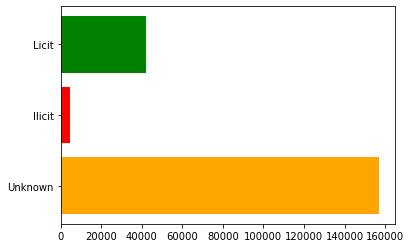

In [24]:
# Bar graph for quantity of transactions per class

groupclass = classes.groupby('class').count()
plt.barh(['Unknown', 'Ilicit', 'Licit'], groupclass['txId'].values, color=['orange', 'r', 'g'] )

Text(0.5, 1.0, 'Number of transactions by Time step')

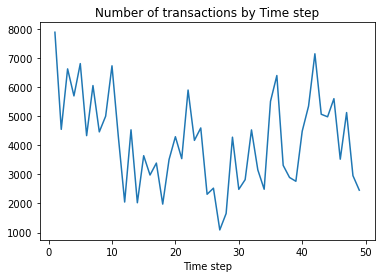

In [25]:
#Checking the number of transactions per Time step

feature = features.groupby('Time step').count()
feature['txId'].plot()
plt.title('Number of transactions by Time step')

In [26]:
#Checking the number of transactions per class and timestep

# Merge Class and features
classfeature = pd.merge(classes, features )
classfeature.head()

,txId,class,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,230425980,3,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,3,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,3,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,2,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,3,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [27]:

groupclassfeature = classfeature.groupby(['Time step', 'class']).count()
groupclassfeature = groupclassfeature['txId'].reset_index().rename(columns={'txId': 'count'})#unstack()
groupclassfeature.head()

,Time step,class,count
0,1,3,5733
1,1,1,17
2,1,2,2130
3,2,3,3427
4,2,1,18


<AxesSubplot:xlabel='Time step', ylabel='count'>

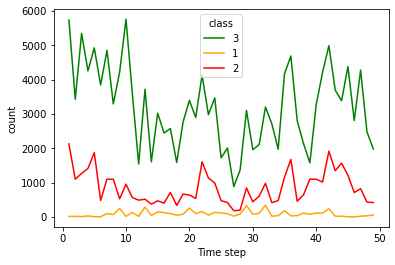

In [28]:
sns.lineplot(x='Time step', y='count', hue='class', data = groupclassfeature, palette=['g', 'orange', 'r'] )

Text(0.5, 0, 'Time step')

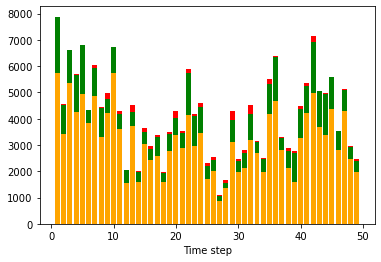

In [29]:
class1 = groupclassfeature[groupclassfeature['class'] == '1']
class2 = groupclassfeature[groupclassfeature['class'] == '2']
class3 = groupclassfeature[groupclassfeature['class'] == 3 ]

p1 = plt.bar(class3['Time step'], class3['count'], color = 'orange')

p2 = plt.bar(class2['Time step'], class2['count'], color='g',
             bottom=class3['count'])

p3 = plt.bar(class1['Time step'], class1['count'], color='r',
             bottom=np.array(class3['count'])+np.array(class2['count']))

plt.xlabel('Time step')

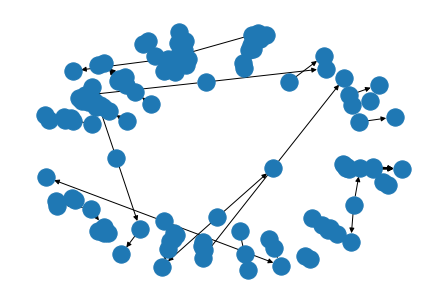

In [34]:
#Ilicit transactions at time step 25

ilicitids = classfeature.loc[(classfeature['Time step'] == 25) & (classfeature['class'] == '1'), 'txId']
ilicitedges = edges.loc[edges['txId1'].isin(ilicitids)]

graph = nx.from_pandas_edgelist(ilicitedges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)

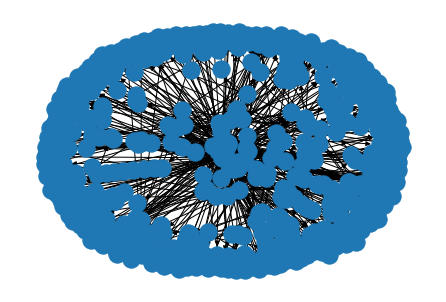

In [35]:
licitids = classfeature.loc[(classfeature['Time step'] == 25) & (classfeature['class'] == '2'), 'txId']
licitedges = edges.loc[edges['txId1'].isin(licitids)]

graph = nx.from_pandas_edgelist(licitedges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)

#### Prediction

In [36]:
#Importing libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

In [38]:
selectedids = classfeature.loc[(classfeature['class'] != 3), 'txId']
edgesselected = edges.loc[edges['txId1'].isin(selectedids)]
classesselected = classes.loc[classes['txId'].isin(selectedids)]
featuresselected = features.loc[features['txId'].isin(selectedids)]

# Merge Class and features
classfeatureselected = pd.merge(classesselected, featuresselected )
classfeatureselected.head()

,txId,class,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,232438397,2,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
1,232029206,2,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,...,-0.577099,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792
2,232344069,2,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
3,27553029,2,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.539735,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
4,3881097,2,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,...,-0.577099,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984


In [39]:
# drop class, text id and time step
X = classfeatureselected.drop(columns=['txId', 'class', 'Time step']) 
y = classfeatureselected[['class']]

# class 2 corresponds to licit transactions, we change this to 0 as our interest is the ilicit transactions
y = y['class'].apply(lambda x: 0 if x == '2' else 1 )

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [41]:
model = RandomForestClassifier().fit(X_train.values,y_train.values)
y_preds = model.predict(X_test.values)

prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds)

print("Random Forest Classifier")
print("Precision:%.3f \nRecall:%.3f \nF1 Score:%.3f"%(prec[1],rec[1],f1[1]))

Random Forest Classifier
Precision:0.998 
Recall:0.888 
F1 Score:0.940


#### Predicting 'unknown' transactions

In [43]:
# Selecting 'unknown' ids

unknownids = classfeature.loc[(classfeature['class'] == 3), 'txId']

edgesunknown = edges.loc[edges['txId1'].isin(unknownids)]
classesunknown = classes.loc[classes['txId'].isin(unknownids)]
featuresunknown = features.loc[features['txId'].isin(unknownids)]

In [44]:
#Predicting Class
X_unknown = featuresunknown.drop(columns=['txId', 'Time step'])
y_unknown_preds = model.predict(X_unknown.values)

In [45]:
#Replacing 'unknown' class with the predicted one
classesunknown = classesunknown.copy()
classesunknown.loc[:, 'class'] = y_unknown_preds

In [46]:
#Merge class and features
classfeatureunknown = pd.merge(classesunknown, featuresunknown )
classfeatureunknown.head()

,txId,class,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,230425980,0,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,0,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,0,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,230460314,0,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,0,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


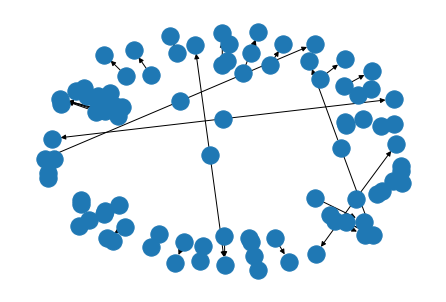

In [48]:
#Predicted graph
ilicitids = classfeatureunknown.loc[(classfeatureunknown['Time step'] == 25) & \
                                    (classfeatureunknown['class'] == 1), 'txId']
ilicitedges = edgesunknown.loc[edgesunknown['txId1'].isin(ilicitids)]

graph = nx.from_pandas_edgelist(ilicitedges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)